# <center>Physiological Signals Processing </center>
## <center>Lab 1: Bioelectrical Signals</center>
### <center>Rebeca Goya Esteban, Óscar Barquero Pérez and Miguel Ángel Cámara Vázquez</center>

Updated: 22nd february 2020

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International license</a>. 

This first lab session aims the students to get used to bioelectrical signals acquisition, as well as with their storage format and time representation. For this purpose, signal acquisition will be carried out using a **BITalino** device and the software **OpenSignals**.

- QuickStart Guide.
https://bitalino.com/storage/uploads/media/quickstart-guide-1003-print-2.pdf

- OpenSignals User Manual.
https://bitalino.com/downloads/OpenSignals_(r)evolution_User_Manual-print.pdf

- BITalino Board Kit Datasheet.
https://bitalino.com/storage/uploads/media/revolution-bitalino-board-kit-datasheet.pdf

- ECG Sensor Datasheet.
https://bitalino.com/storage/uploads/media/revolution-ecg-sensor-datasheet-revb-1.pdf

- EDA Sensor Datasheet.
https://bitalino.com/storage/uploads/media/eda-sensor-datasheet-revb.pdf

## Exercise 1. 

Perform the acquisition of signals using both BITalino device and OpenSignals.
First of all, since the device should be connected to the computer using **Bluetooth**, it must be previously **paired** with the computer you are using. Each BITalino has a **MAC address** assigned, with which you can easily identify it. If the Operating System asks for a **PIN** code to complete the pairing process, enter **1234**.

Then, open the software OpenSignals, and make sure the device is recognised by checking the **Device Manager** section. Previously paired BITalino device should appear. Enable it and check the different parameters that can be tuned (sampling rate, number of channels, units, etc.).

This procedure is also described in the **QuickStart Guide**.

## Exercise 2.

For this practice, two different signals are going to be recorded: **Electrocardiogram (ECG)** and **Electrodermal Activity (EDA)**. Check the **Datasheets** for both ECG and EDA sensors to know which wire set should be used in each case.
Then, check the **BITalino Board Kit Datasheet** to make sure to which connector the wire set should be connected before recording each signal.

Once the wires are connected, attach the **electrodes** to the subject following the next scheme:

EDA:
- Both electrodes on the palm of the same hand, 2 or 3 cm apart.

ECG:
- Red wire: left wrist.
- Black wire: right wrist.
- White wire: left elbow (as near as possible). 
- white wire: near a neutral electrical point 

## Exercise 3.

Perform the **signal acquisition**. Only **two channels** are going to be used. Check the Device Manager section of OpenSignals and enable only **channels 2 (ECG) and 3 (EDA, marcador el sistema nervioso parasimpatetico, si te pegas un susto el valor cambia, de normal es un valor constante- linea verde-)**. Then, assign to each channel the signal it is going to record. Finally, start recording by clicking the **Record** button. Check that both signals are shown in real time.

While both signals are being recorded, the **next experiment** can be carried out. Put on headphones and play the video available in Aula Virtual. Check the behavior of both signals while the video is being played. What happens to the signals? What could be an application of the EDA signal?

## Exercise 4.

End the acquisition of the signals. Visualize the **text files** that OpenSignals has stored. Then, look at the **metadata** and locate those which can be a point of interest: sampling rate, resolution, sensors, etc.

Check out the **data columns**, and locate which ones show the values associated with the signals that have been recorded.

## Exercise 5. 
**Load the text file** that has been saved. $\mathcal{loadtxt}$ function from $\mathcal{numpy}$ can be used. Then, **store in different vectors** both ECG and EDA signals.

Which is the **length of the signals (in samples)**? The function $\mathcal{len()}$ can be used. Which is their **length in seconds**?

In [10]:
import numpy as np
import scipy 

f =np.loadtxt("example.txt");    # Load text file
fs = 100;    # Hz, Sampling rate

ecg = f[:,5];   # Capture ECG signal
eda = f[:,6];   # Capture EDA signal

# Filter EDA and ECG signals
b_ecg, a_ecg = scipy.signal.butter(4, Wn = (0.5, 30), btype='bandpass', fs=fs) # Bandpass filter for ECG
b_eda, a_eda = scipy.signal.butter(4, Wn = 2.8, btype='lowpass', fs=fs)        # Lowpass filter for EDA

ecg = scipy.signal.filtfilt(b_ecg,a_ecg,ecg)
eda = scipy.signal.filtfilt(b_eda,a_eda,eda)

# Print lengths.
print('length of ecg in samples:', len(ecg))
print('length of eda in samples:', len(eda))
print('length of ecg in seconds:', len(ecg)/fs)
print('length of eda in seconds:', len(eda)/fs)
print(ecg.shape)


AttributeError: module 'scipy' has no attribute 'signal'

## Exercise 6. 
**Plot both recorded signals** by using $\mathcal{plot}$ and $\mathcal{subplot}$ functions from $\mathcal{matplotlib.pyplot}$. Signal length in seconds should be considered (not in samples), therefore a **temporal axis** $\mathcal{t}$ should be created. This temporal axis should take into account the sampling rate $\mathcal{f_S}$ of the signals. $\mathcal{arange}$ or $\mathcal{linspace}$ functions from $\mathcal{numpy}$ can be used.

Visualization area can be restricted to a few seconds by using $\mathcal{xlim}$ function from $\mathcal{matplotlib.pyplot}$.

<IPython.core.display.Javascript object>


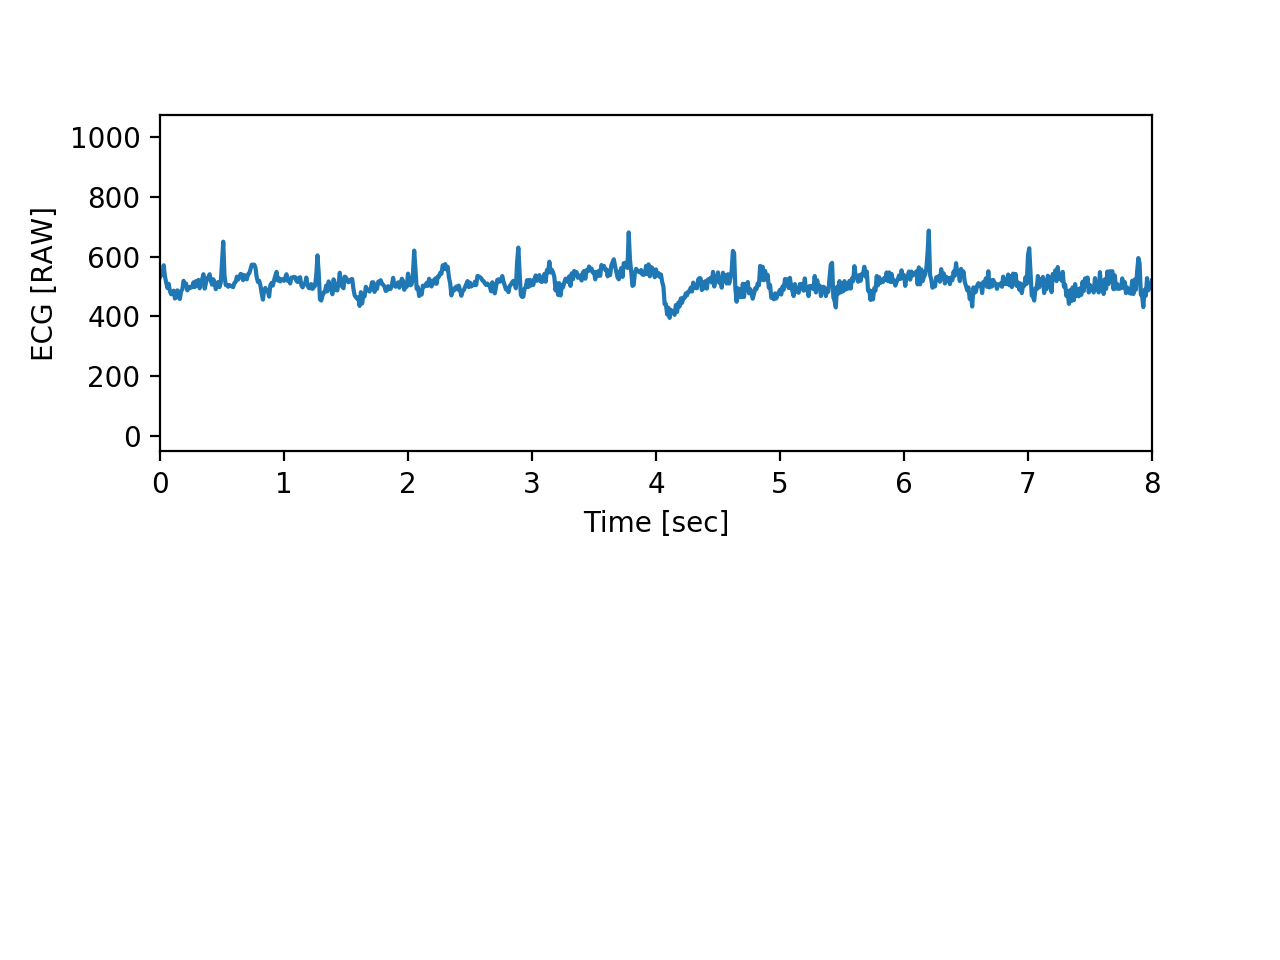

<IPython.core.display.Javascript object>


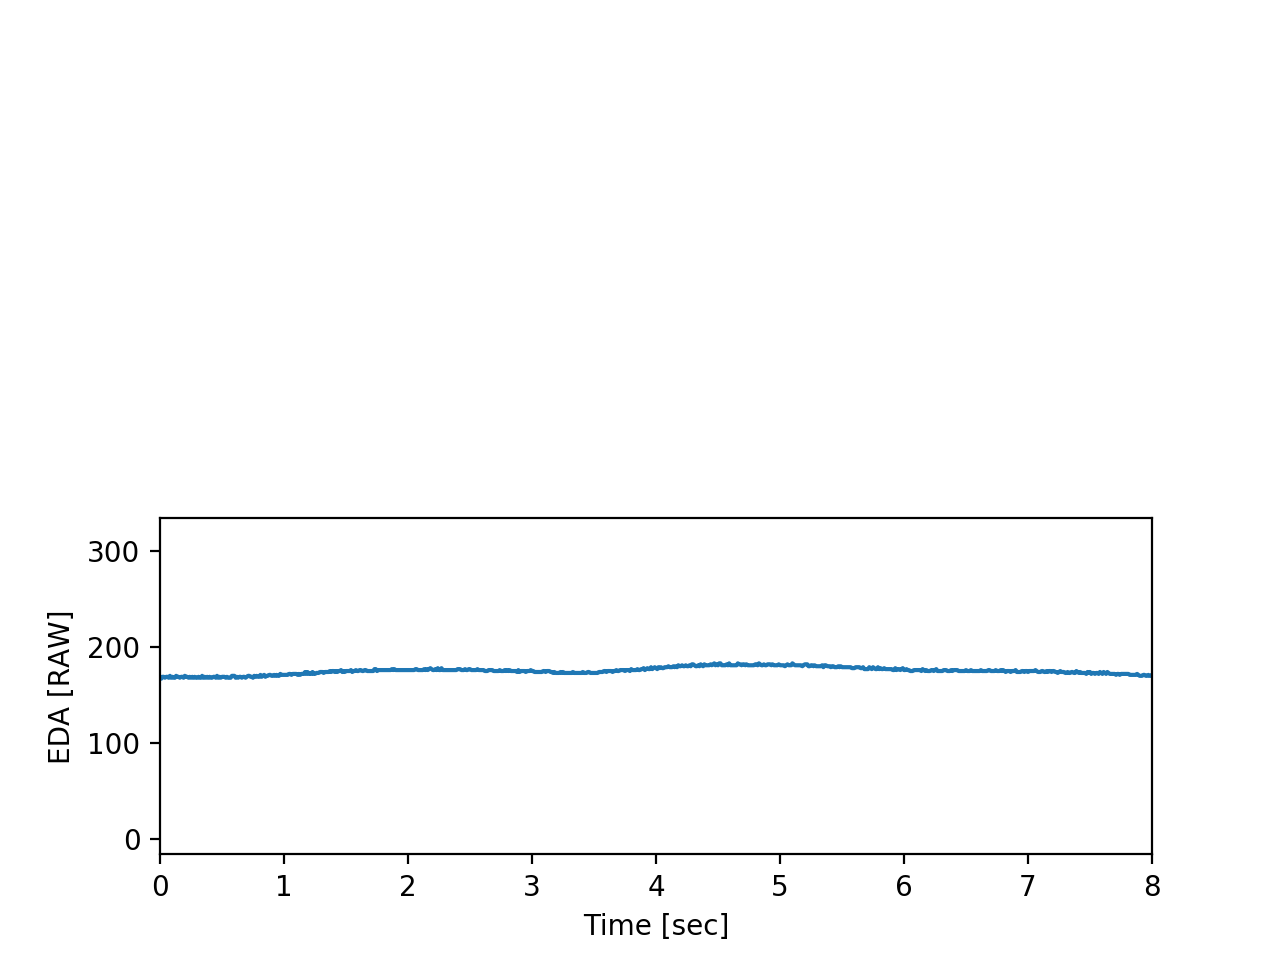

(0, 8)

In [20]:
import matplotlib.pyplot as plt
%matplotlib notebook

t =np.arange(0,len(ecg)/fs,1/fs)      # Generate temporal axes

# Plotting ECG
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,ecg)
plt.xlabel('Time [sec]')
plt.ylabel('ECG [RAW]') 
plt.xlim((0,8))

# Plotting EDA
plt.figure()
plt.subplot(2,1,2)
plt.plot(t,eda)
plt.xlabel('Time [sec]')
plt.ylabel('EDA [RAW]')
plt.xlim((0,8))


## Exercise 7.
Finally, as can be seen, the amplitudes of the signals are in **raw values** directly given by the analog-to-digital converter (ADC) of the sensor. Transform those raw signals to be scaled to mV (in the case of ECG) and μS (in the case of EDA). To know which is the **transfer function** to be applied, check both ECG and EDA datasheets.
Once the conversion is performed, **show the results** using the same methodology as in **Exercise 6**.

In [ ]:
VCC =     # V
n =       # Resolution of the ADC
G_ECG =   # ECG Sensor gain

ECG_mV =  # ECG transfer function
EDA_uS =  # EDA transfer function

# Plot results
# Plotting ECG
plt.figure()
...
...
...
plt.ylabel('ECG [mV]')  

# Plotting EDA
...
...
...
plt.xlabel('Time [sec]')
plt.ylabel('EDA [uS]')